<a href="https://colab.research.google.com/github/saurav188/Object_Detection/blob/main/CutLer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U tensorflow-addons
!pip install --quiet vit-keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras import layers
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
from vit_keras import vit

In [ ]:
vit_model = vit.vit_b32(
        image_size = 32,
        activation = 'softmax',
        pretrained = True,
        include_top = False,
        pretrained_top = False,
        classes = 5)

In [ ]:
vit_model.summary()

Model: "vit-b32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 embedding (Conv2D)          (None, 1, 1, 768)         2360064   
                                                                 
 reshape_8 (Reshape)         (None, 1, 768)            0         
                                                                 
 class_token (ClassToken)    (None, 2, 768)            768       
                                                                 
 Transformer/posembed_input   (None, 2, 768)           1536      
 (AddPositionEmbs)                                               
                                                                 
 Transformer/encoderblock_0   ((None, 2, 768),         7087872   
 (TransformerBlock)           (None, 12, None, None))      

In [ ]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

In [ ]:
image_size=128
patch_size=32

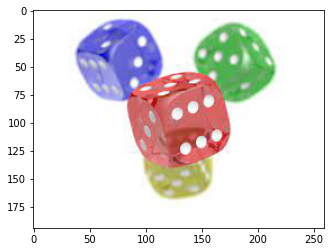

In [ ]:
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/sample_data/download.jpeg')
imgplot = plt.imshow(img)
plt.show()

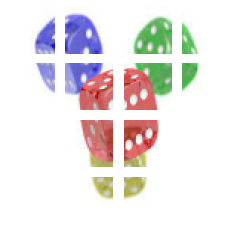

In [ ]:
resized_image = tf.image.resize(
    tf.convert_to_tensor([img]), size=(image_size, image_size)
)

patches=Patches(patch_size)(resized_image)

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
pre_proccessed_patches=[]
for i,patch in enumerate(patches[0]):
  pre_proccessed_patches.append(patch.numpy().reshape((32,32,3)))

In [ ]:
output=vit_model.predict(np.array(pre_proccessed_patches))
output.shape

1/1 [==============================] - 0s 458ms/step


(16, 768)

In [ ]:
def similarity(A,B):
  return np.dot(A,B.T)/(np.sqrt(np.sum(A**2))*np.sqrt(np.sum(B**2)))

In [ ]:
E=[[similarity(output[i],output[j]) for i in range(output.shape[0])] for j in range(output.shape[0])]
D=[[0 for i in range(output.shape[0])] for j in range(output.shape[0])]
for i in range(len(D)):
  D[i][i]=sum(E[i])

In [3]:
!git config –global user.name “saurav188”

fatal: not in a git directory
